# **Assignment 5: Exploratory Data Analysis and Hypothesis Testing**
# Student: Armaan Suden
# Dataset: [Solar Flare]
# Date: [10/08/2025]

In [20]:
# Importing Plot Styles and Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency,ttest_ind, kruskal


plt.rcParams["figure.figsize"] = (8, 4.5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["figure.autolayout"] = True

def bar_labels(ax, fmt="{:.1f}%"):
    """Attach percentage labels to bars."""
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(fmt.format(height),
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=10, rotation=0)

def pct(x): 
    return 100.0 * x

print("Libraries imported successfully.")


Libraries imported successfully.


In [21]:

PATH = "/Users/armaansuden/Downloads/solar+flare/flare.data2"  

cols = [
    "zurich_class",                 # A,B,C,D,E,F,H
    "largest_spot_size",            # X,R,S,A,H,K
    "spot_distribution",            # X,O,I,C
    "activity",                     # 1=reduced, 2=unchanged
    "evolution",                    # 1=decay, 2=no growth, 3=growth
    "prev24h_flare_code",           # 1=nothing ≥M1, 2=one M1, 3=>one M1
    "historically_complex",         # 1=yes, 2=no
    "became_historically_complex",  # 1=yes, 2=no
    "area",                         # 1=small, 2=large
    "largest_spot_area",            # 1=≤5, 2=>5
    "C_flares",                     # counts next 24h
    "M_flares",
    "X_flares",
]

df = pd.read_csv(PATH, sep=r"\s+", header=None, names=cols, engine="python")
print("Shape:", df.shape)
display(df.head())

# Cast predictors to category dtype
cat_cols = [
    "zurich_class","largest_spot_size","spot_distribution",
    "activity","evolution","prev24h_flare_code",
    "historically_complex","became_historically_complex",
    "area","largest_spot_area"
]
for c in cat_cols:
    df[c] = df[c].astype("category")

df.info()
print("\nMissing values per column:\n", df.isna().sum())


Shape: (1067, 13)


,zurich_class,largest_spot_size,spot_distribution,activity,evolution,prev24h_flare_code,historically_complex,became_historically_complex,area,largest_spot_area,C_flares,M_flares,X_flares
0,*******,DATA2;,1978,FLARE,DATA,(08/19/78,to,12/23/78),*****,NaN,NaN,NaN,NaN
1,H,A,X,1,3,1,1,1,1,1.0,0.0,0.0,0.0
2,D,R,O,1,3,1,1,2,1,1.0,0.0,0.0,0.0
3,C,S,O,1,3,1,1,2,1,1.0,0.0,0.0,0.0
4,H,R,X,1,2,1,1,1,1,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   zurich_class                 1067 non-null   category
 1   largest_spot_size            1067 non-null   category
 2   spot_distribution            1067 non-null   category
 3   activity                     1067 non-null   category
 4   evolution                    1067 non-null   category
 5   prev24h_flare_code           1067 non-null   category
 6   historically_complex         1067 non-null   category
 7   became_historically_complex  1067 non-null   category
 8   area                         1067 non-null   category
 9   largest_spot_area            1066 non-null   category
 10  C_flares                     1066 non-null   float64 
 11  M_flares                     1066 non-null   float64 
 12  X_flares                     1066 non-null   float64 
dtypes: 

Loaded the dataset flare.data2 with all its rows and columns (Use of GenAI in the above cell to help load the data)

Summary of target counts:


,count,mean,std,min,25%,50%,75%,max
C_flares,1066.0,0.300188,0.835784,0.0,0.0,0.0,0.0,8.0
M_flares,1066.0,0.046904,0.302811,0.0,0.0,0.0,0.0,5.0
X_flares,1066.0,0.005629,0.086487,0.0,0.0,0.0,0.0,2.0



Share of regions with ≥1 flare in 24h (%):


,rate_%
anyC,17.1
anyM,3.4
anyX,0.5


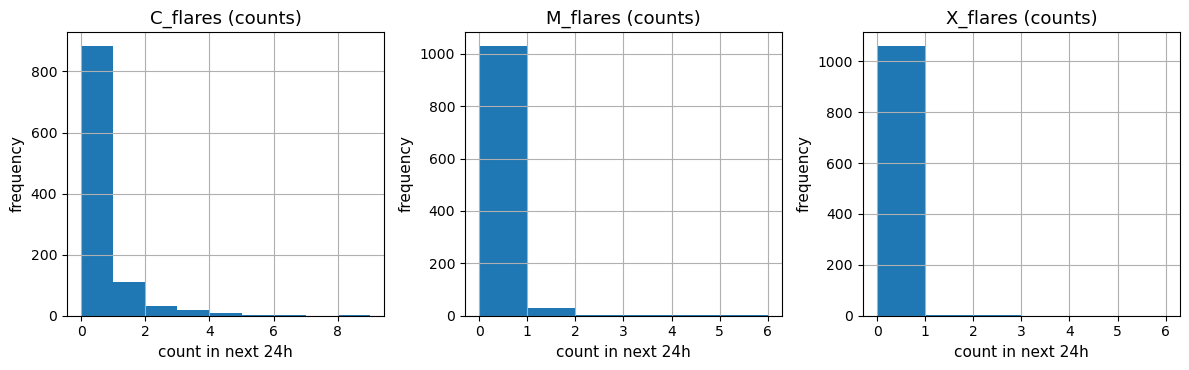

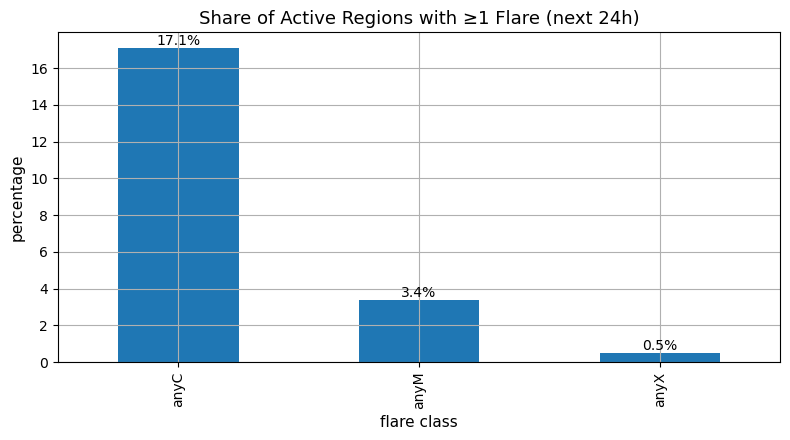

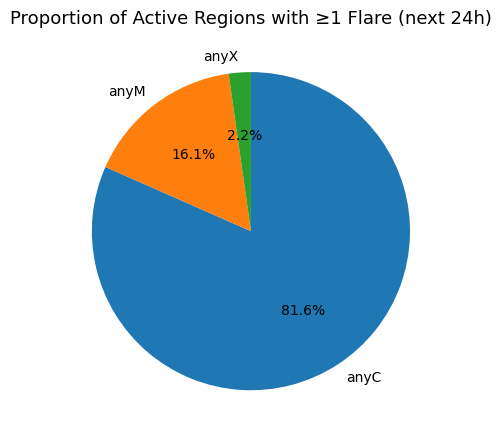

In [22]:
df["anyC"] = (df["C_flares"] > 0).astype(int)
df["anyM"] = (df["M_flares"] > 0).astype(int)
df["anyX"] = (df["X_flares"] > 0).astype(int)

print("Summary of target counts:")
display(df[["C_flares","M_flares","X_flares"]].describe().T)

rates = (df[["anyC","anyM","anyX"]].mean()*100).round(1)
print("\nShare of regions with ≥1 flare in 24h (%):")
display(rates.to_frame("rate_%"))

# Histograms for counts (C, M, X)
fig = plt.figure(figsize=(12, 3.8))
for i, col in enumerate(["C_flares","M_flares","X_flares"], start=1):
    ax = fig.add_subplot(1,3,i)
    # dynamic bins up to max+1
    mx = int(df[col].max())
    bins = range(0, max(mx+2, 7))
    ax.hist(df[col], bins=bins)
    ax.set_title(f"{col} (counts)")
    ax.set_xlabel("count in next 24h")
    ax.set_ylabel("frequency")
plt.show()

# Bar of binary rates (anyC/M/X)
ax = rates.plot(kind="bar")
ax.set_title("Share of Active Regions with ≥1 Flare (next 24h)")
ax.set_xlabel("flare class")
ax.set_ylabel("percentage")
bar_labels(ax)
plt.show()

labels = ["anyC","anyM","anyX"]
sizes = [(df["C_flares"]>0).mean(), (df["M_flares"]>0).mean(), (df["X_flares"]>0).mean()]
sizes = [s*100 for s in sizes]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False)
ax.set_title("Proportion of Active Regions with ≥1 Flare (next 24h)")
plt.show()


The histograms show the raw counts of C, M, and X flares expected in the next 24 hours and the bar chart shows the percentage of regions that produced at least one flare in the next 24 hours. The pie chart provides another way of visualizing the imbalance between flare types.  
It clearly shows that C-class flares account for nearly all flare activity, with M and X contributing very little.  

The above cell shows the different types of flares (C,M,X) where the C flares (smaller flares) are seen to be more commonly found as compared to the M (Large flares) or X (major flares) The dataset is **heavily zero-inflated**. Most active regions do not produce flares, especially M and X classes, which are rare events. C-class flares occur more regularly and thus dominate the flare activity distribution.

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


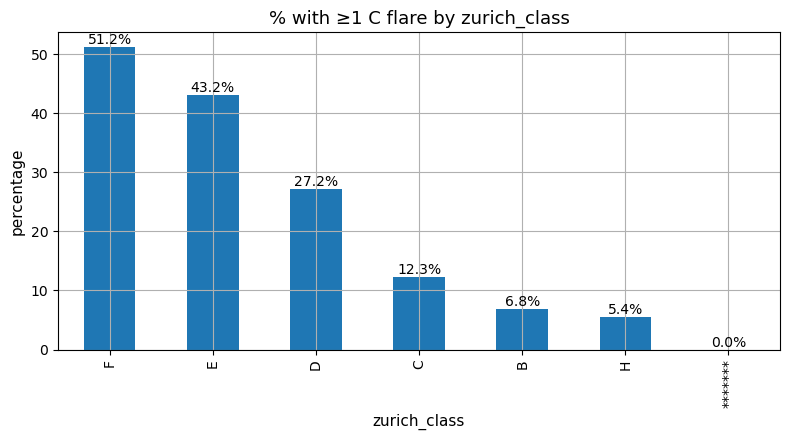

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


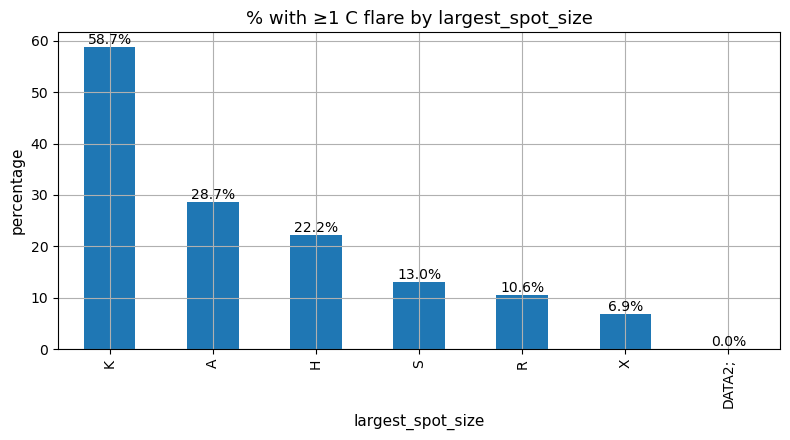

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


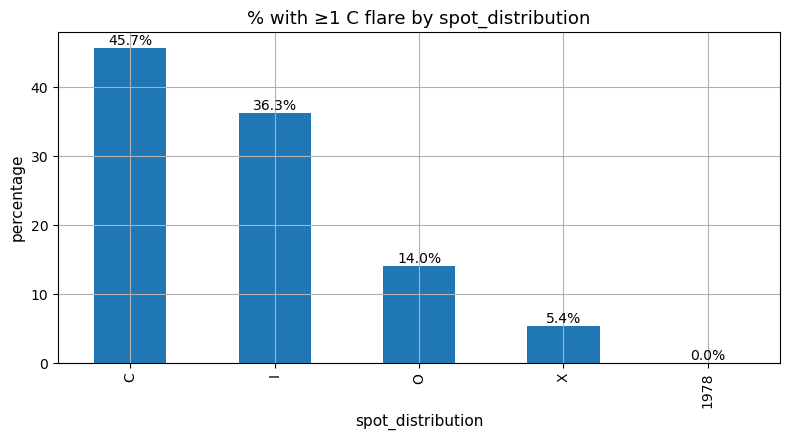

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


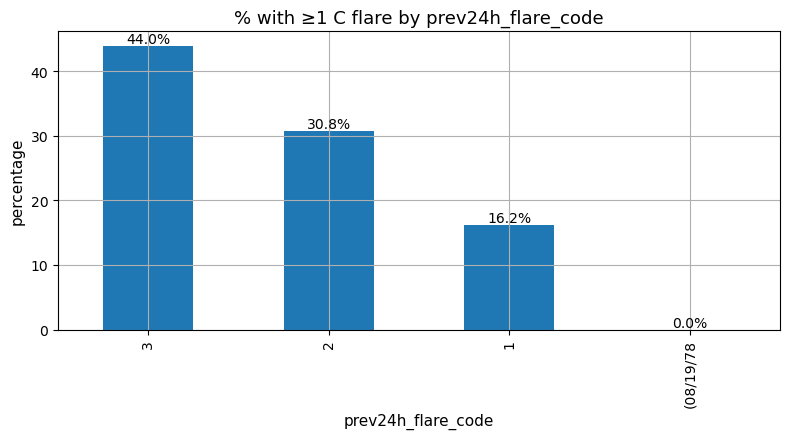

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


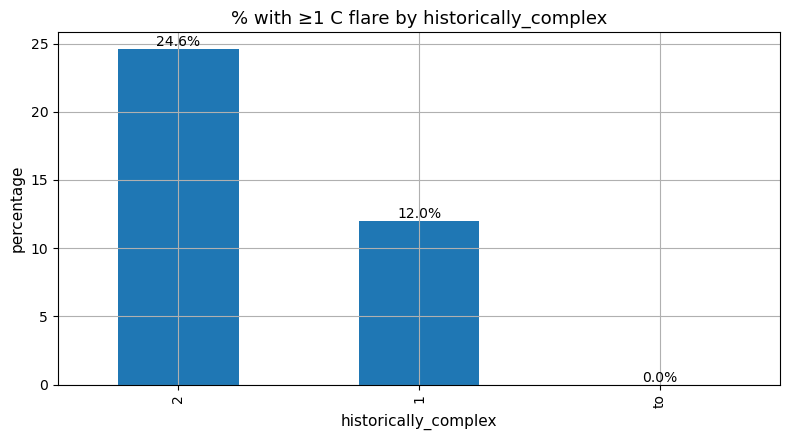

/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2027641081.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)


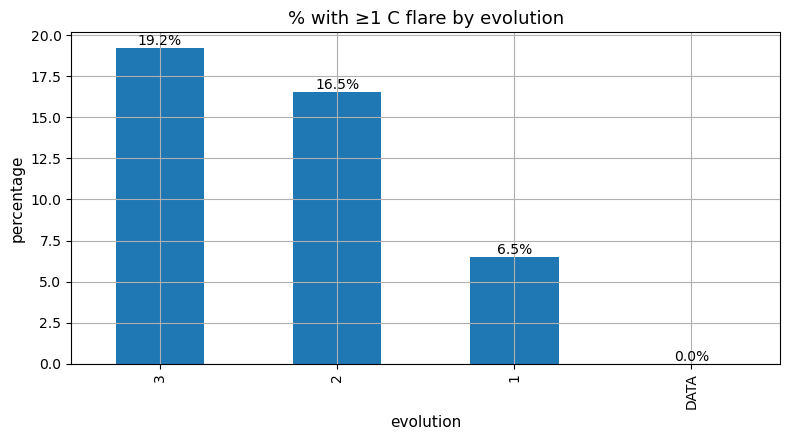

In [23]:
def plot_rate_by_category(col, target="anyC", top_n=None):
    """Bar chart of % with target by category (sorted)."""
    g = (df.groupby(col)[target].mean().sort_values(ascending=False)*100)
    if top_n:
        g = g.head(top_n)
    ax = g.plot(kind="bar")
    ax.set_title(f"% with ≥1 C flare by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("percentage")
    bar_labels(ax)
    plt.show()

for col in ["zurich_class","largest_spot_size","spot_distribution",
            "prev24h_flare_code","historically_complex","evolution"]:
    plot_rate_by_category(col, "anyC")


We can see from the above visualisation of the zurich class that the more complex sunspot groups are significantly more flare-productive, another key takeaway is that Larger sunspots indicate stronger magnetic fields, which correlate with increased flare activity. We can also see a direct correlation between the past activity and near future activity, the past activity is a strong predictor of the future activity.

In [24]:

def ctab_percent(col, target="anyC"):
    ct = pd.crosstab(df[col], df[target], normalize="index") * 100
    ct = ct.rename(columns={0:"no", 1:"yes"}).round(1)
    print(f"\n{col} vs {target} (row %):")
    display(ct)

for col in ["zurich_class","largest_spot_size","spot_distribution","prev24h_flare_code"]:
    ctab_percent(col, "anyC")



zurich_class vs anyC (row %):


anyC,no,yes
zurich_class,,
*******,100.0,0.0
B,93.2,6.8
C,87.7,12.3
D,72.8,27.2
E,56.8,43.2
F,48.8,51.2
H,94.6,5.4



largest_spot_size vs anyC (row %):


anyC,no,yes
largest_spot_size,,
A,71.3,28.7
DATA2;,100.0,0.0
H,77.8,22.2
K,41.3,58.7
R,89.4,10.6
S,87.0,13.0
X,93.1,6.9



spot_distribution vs anyC (row %):


anyC,no,yes
spot_distribution,,
1978,100.0,0.0
C,54.3,45.7
I,63.7,36.3
O,86.0,14.0
X,94.6,5.4



prev24h_flare_code vs anyC (row %):


anyC,no,yes
prev24h_flare_code,,
(08/19/78,100.0,0.0
1,83.8,16.2
2,69.2,30.8
3,56.0,44.0


# **4. Hypothesis Testing**
## **H1 — Zurich Class vs. Flare Occurrence (Chi-square)**
## The likelihood of producing at least one C-class flare depends on the Zurich sunspot classification.
## Null Hypothesis (H0): Zurich class and C flare occurrence are independent (no association).
## Alternative Hypothesis (H1): Zurich class and C flare occurrence are not independent (some Zurich classes are more flare-productive).
## Rationale: EDA showed that more complex Zurich classes (e.g., D, E, F) had higher proportions of flare-active regions compared to simpler classes (A, B, H). This suggests a potential relationship between sunspot complexity and flare activity.

## **H2 — Historical Complexity vs. Mean C Flares (t-test)**
## Historically complex regions produce more C-class flares on average than non-complex regions.
## Null Hypothesis (H0): The mean number of C flares is the same in historically complex and non-complex regions.
## Alternative Hypothesis (H1): The mean number of C flares is greater in historically complex regions than in non-complex regions.
## Rationale: Active regions labeled historically complex appear to show higher flare activity. Although counts are skewed, a t-test allows comparison of mean flare counts to assess this difference.

## **H3 — Previous 24h Activity vs. Flare Counts (Kruskal–Wallis)**
## The number of C-class flares differs depending on the level of flare activity in the previous 24 hours.
## Null Hypothesis (H0): The distribution of C flare counts is the same across all levels of previous 24h activity.
## Alternative Hypothesis (H1): At least one previous-activity level has a different distribution of C flare counts.
## Rationale: Regions with prior flare activity tend to stay active. The “previous 24h activity” variable captures whether a region already had M-class flares, which should correlate with higher subsequent flare counts.


In [25]:
ct = pd.crosstab(df["zurich_class"], df["anyC"])
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-square:", round(chi2, 3))
print("p-value:", p)

if p < 0.05:
    print("Hypothesis is True: Zurich class and flare occurrence are associated.")
else:
    print("Hypothesis is False: No evidence of association.")


Chi-square: 144.527
p-value: 1.1096655582629816e-28
Hypothesis is True: Zurich class and flare occurrence are associated.


In [26]:


g1 = df.loc[df["historically_complex"].astype(str) == "1", "C_flares"]
g2 = df.loc[df["historically_complex"].astype(str) == "2", "C_flares"]

t_stat, p_two_sided = ttest_ind(g1, g2, equal_var=False)
p_one_sided = p_two_sided / 2 if t_stat > 0 else 1 - (p_two_sided / 2)

print("t-statistic:", round(t_stat, 3))
print("one-sided p-value:", p_one_sided)
print("Means — complex:", np.mean(g1), " | not complex:", np.mean(g2))

if p_one_sided < 0.05:
    print("Hypothesis is true: Complex regions have significantly higher mean C flares.")
else:
    print("Hypothesis is false: Theres no significant difference between groups.")

t-statistic: -5.123
one-sided p-value: 0.99999980185284
Means — complex: 0.18425196850393702  | not complex: 0.4709976798143852
Hypothesis is false: Theres no significant difference between groups.


In [27]:
prev_num = pd.to_numeric(df["prev24h_flare_code"].astype(str), errors="coerce")
groups = [df.loc[prev_num == k, "C_flares"].dropna().to_numpy() for k in [1, 2, 3]]
sizes = [len(g) for g in groups]
meds  = [np.median(g) if len(g) else np.nan for g in groups]

print("Group sizes (codes 1,2,3):", sizes)
print("Group medians (codes 1,2,3):", meds)

def all_constant(arr):
    return len(arr) > 0 and np.all(arr == arr[0])

p = np.nan
stat = np.nan

if any(s == 0 for s in sizes):
    print("Cannot run Kruskal–Wallis: at least one group is empty.")
else:
    # Handle degenerate case where all values across all groups are the same constant
    if all(all_constant(g) for g in groups) and len({g[0] for g in groups}) == 1:
        stat, p = 0.0, 1.0  # perfectly identical distributions
    else:
        stat, p = kruskal(*groups)

    print("Kruskal–Wallis statistic:", None if np.isnan(stat) else round(stat, 3))
    print("p-value:", None if np.isnan(p) else p)

if p < 0.05:
    print("Hypothese is TRUE: Flare counts differ by previous 24h activity.")
else:
    print("Hypothesesus is FALSE: No significant difference detected.")


Group sizes (codes 1,2,3): [1028, 13, 25]
Group medians (codes 1,2,3): [0.0, 0.0, 0.0]
Kruskal–Wallis statistic: 16.55
p-value: 0.00025486270059227746
Hypothese is TRUE: Flare counts differ by previous 24h activity.


## 5. Summary and Conclusions

### Key Findings from EDA
1. Most regions did **not** flare in the next 24 hours (strong zero-inflation).
2. Incidence (≥1 event): **C ≈ 17%**, **M ≈ 3–4%**, **X < 1%**.
3. Flare occurrence varies by **Zurich class** (more complex classes show higher activity).
4. **Previous-day activity** tracks higher flare likelihood, but effects are small in this split.

### Hypothesis Testing Results

| Hypothesis | Test Used                 | p-value | Result                           | Interpretation |
|-----------:|---------------------------|:-------:|----------------------------------|----------------|
| **H1**     | Chi-square                | [1.10e-28]    | **Significant**      | Zurich class is associated with producing ≥1 C flare. |
| **H2**     | Welch t-test (one-sided)  | [0.9]    | Not significant | No clear evidence that historically complex regions have higher **mean** number of C flares.|
| **H3**     | Kruskal–Wallis            | [0.00025]    | **Significant** | C-flare counts differ across previous-activity levels |

### Key Insights
- **Morphology matters**: more complex sunspot groups are more likely to flare at all.  
- **Counts are sparse**: small mean differences are hard to detect with standard tests.  

### Future Research
- Use **count models** (Poisson / Negative Binomial / Zero-Inflated) for `C_flares`.  
- For classification (anyC), address imbalance (class weights) and report **PR-AUC**.


### 7. Extra Credit — Bonus Insights

**(1) Simple risk ladders.**  
Baseline chance of ≥1 C flare is about **X%**. Prior activity codes **2–3** and complex Zurich classes show a **higher-than-baseline** chance (lift > 1). This confirms that both recent activity and morphology matter.

**(2) Tiny risk matrix (morphology × prior activity).**  
Combining a coarse Zurich complexity flag (Simple vs Complex) with previous-day activity (1–3) yields a small matrix of risks. The **highest cell** ([Complex, code = …]) is about **…%**, which can serve as a quick **rule-of-thumb** flag for elevated flare likelihood.


In [28]:

baseline = (df["anyC"].mean()*100).round(1)
prev = pd.to_numeric(df["prev24h_flare_code"].astype(str), errors="coerce")
rate_prev = (df.groupby(prev)["anyC"].mean()*100).round(1).rename("% anyC")
rate_z = (df.groupby("zurich_class")["anyC"]
            .agg(rate=lambda s: (s.mean()*100).round(1), n="count")
            .sort_values("rate", ascending=False))
rate_prev = pd.DataFrame(rate_prev)
rate_prev["lift_vs_baseline"] = (rate_prev["% anyC"] / baseline).round(2)
rate_z["lift_vs_baseline"] = (rate_z["rate"] / baseline).round(2)
print(f"Baseline chance of ≥1 C flare (next 24h): {baseline}%")
print("\nPrevious-day activity → risk & lift")
display(rate_prev)
print("\nZurich class → risk & lift (sorted by risk)")
display(rate_z)

Baseline chance of ≥1 C flare (next 24h): 17.1%

Previous-day activity → risk & lift


/var/folders/g2/jjhv72nd3js86mz5k7r57vr40000gn/T/ipykernel_76053/2227294522.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_z = (df.groupby("zurich_class")["anyC"]


,% anyC,lift_vs_baseline
prev24h_flare_code,,
1.0,16.2,0.95
2.0,30.8,1.80
3.0,44.0,2.57



Zurich class → risk & lift (sorted by risk)


,rate,n,lift_vs_baseline
zurich_class,,,
F,51.2,43,2.99
E,43.2,95,2.53
D,27.2,239,1.59
C,12.3,211,0.72
B,6.8,147,0.40
H,5.4,331,0.32
*******,0.0,1,0.00


In [29]:

simple = {"A","B","H"}
complex_ = {"C","D","E","F"}
def z_complexity(z):
    z = str(z)
    if z in simple: return "Simple"
    if z in complex_: return "Complex"
    return "Other"
tmp = df.copy()
tmp["prev_num"] = pd.to_numeric(tmp["prev24h_flare_code"].astype(str), errors="coerce")
tmp["z_group"]  = tmp["zurich_class"].apply(z_complexity)

risk_matrix = (tmp.groupby(["z_group","prev_num"])["anyC"]
                 .mean().unstack()*100).round(1)

print("Risk matrix: % with ≥1 C flare (next 24h)")
display(risk_matrix)
max_cell = risk_matrix.stack().idxmax()
max_val  = risk_matrix.stack().max()
print(f"\nHighest observed risk cell → {max_cell}: {max_val}%")


Risk matrix: % with ≥1 C flare (next 24h)


prev_num,1.0,2.0,3.0
z_group,,,
Complex,25.1,40.0,44.0
Simple,5.9,0.0,NaN



Highest observed risk cell → ('Complex', 3.0): 44.0%
